# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import glob


columns = ['num','action', 'stage', 'dealer', 'hand_strength', 'hand_rank', 'opp_last_action',
        'my_last_action', 'my_stack_committed_curr_phase', 'opp_stack_committed_curr_phase',
        'my_num_raises_curr_phase', 'opp_num_raises_curr_phase',
        'my_num_raises_total', 'opp_num_raises_total','num_outs', 
        'winning_prob','highest_card', 'num_aces', 'num_kings', 'num_queens']

path = '/Users/zacharydawson/artificial-intelligence/poker/data/hand_histories' 
all_files = glob.glob(path + "/overnight_[0-9].csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=False, names=columns, low_memory=False)
    df = df.drop(0,axis=0)
    li.append(df)

hands = pd.concat(li, axis=0)
hands = hands.fillna(0)
hands = hands[hands.action != 'target']
hands = hands.reset_index()
hands = hands.drop(['index'], axis=1)
hands

,num,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
0,0.0,0,0,True,0.0004854368932038835,High Card,0,0,0,0,0,0,0,0,0,32.745,0,0,0,0
1,1.0,1,0,False,0.005885922330097088,High Card,0,0,0,0.5,0,1,0,1,0,58.725,0,0,0,0
2,2.0,5,0,True,0.0004854368932038835,High Card,0,1,0.5,1.0,1,1,1,1,0,32.745,0,0,0,0
3,3.0,3,0,False,0.005885922330097088,High Card,1,5,1.0,1.0,1,2,1,2,0,58.725,0,0,0,0
4,4.0,3,1,False,0.006113707903519418,High Card,3,5,0,0,0,0,2,2,15,31.5,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712836,142906.0,4,2,False,0.12999172766231795,Pair,4,5,0,0,0,0,3.0,3.0,11,23.1,12,1,1,0
712837,142907.0,2,2,True,0.006174506030036408,High Card,5,4,0,2.0,0,2.0,3.0,5.0,15,31.5,12,1,1,0
712838,142908.0,0,0,False,0.003033980582524272,High Card,0,0,0,0,0,0,0,0,0,43.394999999999996,0,0,0,0
712839,142909.0,1,0,False,0.0024271844660194173,High Card,0,0,0,0.5,0,1,0,1,0,34.96,0,0,0,0


In [2]:
hands['action'] = hands['action'].astype(int)
hands['dealer'] = hands['dealer'] * 1
hands = hands[(hands.action == 2)| (hands.action == 3) | (hands.action == 4) | (hands.action == 5) | (hands.action == 6)] ## remove all actions that are not check, call, bet, or fold: (all non-mandatory actions) 
hand_ranks={
    'High Card':0,
    'Pair':1,
    'Two Pair':2,
    'Trips':3,
    'Straight':4,
    'Flush': 5,
    'Full House': 6,
    'Quads': 7,
    'Straight Flush': 8
}

action_types = {
    2: 0,
    3: 1,
    5: 1,
    4: 2,
    6: 2
}

bools = {
    'True': True,
    'False': False
}

hands['dealer'] = hands['dealer'].map(bools)
hands['hand_rank'] = hands['hand_rank'].map(hand_ranks)
hands['action'] = hands['action'].map(action_types)
hands

<ipython-input-2-e7c4f6c997ca>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hands['dealer'] = hands['dealer'].map(bools)
<ipython-input-2-e7c4f6c997ca>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hands['hand_rank'] = hands['hand_rank'].map(hand_ranks)
<ipython-input-2-e7c4f6c997ca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,num,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2.0,1,0,True,0.0004854368932038835,0,0,1,0.5,1.0,1,1,1,1,0,32.745,0,0,0,0
3,3.0,1,0,False,0.005885922330097088,0,1,5,1.0,1.0,1,2,1,2,0,58.725,0,0,0,0
4,4.0,1,1,False,0.006113707903519418,0,3,5,0,0,0,0,2,2,15,31.5,9,0,0,0
5,5.0,2,1,True,0.12456019133040049,1,5,3,0,0,0,0,2,2,11,23.1,9,0,0,0
6,6.0,2,1,False,0.006113707903519418,0,3,4,0,1.0,0,1.0,2,3.0,15,31.5,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,142904.0,2,1,False,0.12999172766231795,1,3,5,0,0,0,0,2,2,11,23.1,12,1,1,0
712835,142905.0,1,1,True,0.006174506030036408,0,5,4,0,1.0,0,1.0,2,3.0,15,31.5,12,1,1,0
712836,142906.0,2,2,False,0.12999172766231795,1,4,5,0,0,0,0,3.0,3.0,11,23.1,12,1,1,0
712837,142907.0,0,2,True,0.006174506030036408,0,5,4,0,2.0,0,2.0,3.0,5.0,15,31.5,12,1,1,0


In [3]:
hands = hands.astype({'action': 'int32','stage': 'int32','dealer': 'boolean','hand_strength': 'float','hand_rank': 'object',
             'opp_last_action': 'int32','my_last_action': 'int32','my_stack_committed_curr_phase': 'float','opp_stack_committed_curr_phase': 'float',
              'my_num_raises_curr_phase': 'float','opp_num_raises_curr_phase': 'float', 'my_num_raises_total': 'float',
             'opp_num_raises_total': 'float', 'num_outs': 'int32', 'winning_prob': 'float','highest_card': 'int32',
             'num_aces': 'int32','num_kings': 'int32','num_queens': 'int32'})

In [4]:
hands

,num,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2.0,1,0,True,0.000485,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,32.745,0,0,0,0
3,3.0,1,0,False,0.005886,0,1,5,1.0,1.0,1.0,2.0,1.0,2.0,0,58.725,0,0,0,0
4,4.0,1,1,False,0.006114,0,3,5,0.0,0.0,0.0,0.0,2.0,2.0,15,31.500,9,0,0,0
5,5.0,2,1,True,0.124560,1,5,3,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,9,0,0,0
6,6.0,2,1,False,0.006114,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,142904.0,2,1,False,0.129992,1,3,5,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,12,1,1,0
712835,142905.0,1,1,True,0.006175,0,5,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,12,1,1,0
712836,142906.0,2,2,False,0.129992,1,4,5,0.0,0.0,0.0,0.0,3.0,3.0,11,23.100,12,1,1,0
712837,142907.0,0,2,True,0.006175,0,5,4,0.0,2.0,0.0,2.0,3.0,5.0,15,31.500,12,1,1,0


# Charts

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

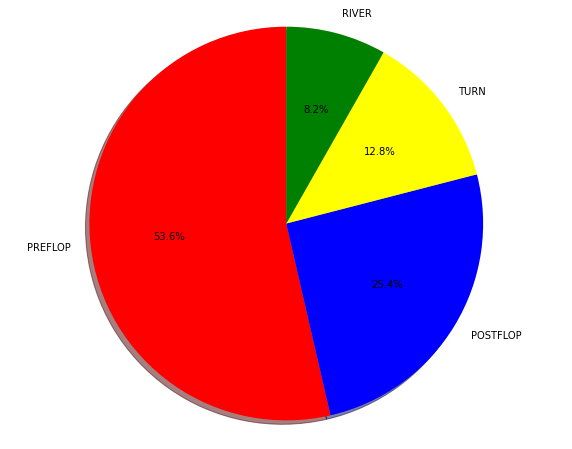

In [6]:
labels = ['PREFLOP', 'POSTFLOP', 'TURN', 'RIVER']
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 8)
ax1.pie(hands.groupby('stage').count()['dealer'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red', 'blue', 'yellow', 'green'])
ax1.axis('equal')

plt.show()

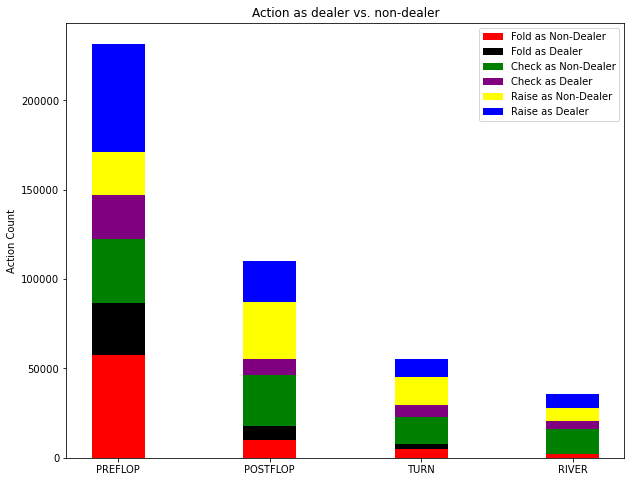

In [7]:
preflop = hands[(hands.stage==0)]
postflop = hands[(hands.stage==1)]
turn = hands[(hands.stage==2)]
river = hands[(hands.stage==3)]
nd_fold = [len(preflop[(preflop.dealer==False) & (preflop.action==0)]), len(postflop[(postflop.dealer==False) & (postflop.action==0)]), len(turn[(turn.dealer==False) & (turn.action==0)]), len(river[(river.dealer==False) & (river.action==0)])]
d_fold = [len(preflop[(preflop.dealer==True) & (preflop.action==0)]), len(postflop[(postflop.dealer==True) & (postflop.action==0)]), len(turn[(turn.dealer==True) & (turn.action==0)]), len(river[(river.dealer==True) & (river.action==0)])]
nd_check = [len(preflop[(preflop.dealer==False) & (preflop.action==1)]), len(postflop[(postflop.dealer==False) & (postflop.action==1)]), len(turn[(turn.dealer==False) & (turn.action==1)]), len(river[(river.dealer==False) & (river.action==1)])]
d_check = [len(preflop[(preflop.dealer==True) & (preflop.action==1)]), len(postflop[(postflop.dealer==True) & (postflop.action==1)]), len(turn[(turn.dealer==True) & (turn.action==1)]), len(river[(river.dealer==True) & (river.action==1)])]
nd_raise = [len(preflop[(preflop.dealer==False) & (preflop.action==2)]), len(postflop[(postflop.dealer==False) & (postflop.action==2)]), len(turn[(turn.dealer==False) & (turn.action==2)]), len(river[(river.dealer==False) & (river.action==2)])]
d_raise = [len(preflop[(preflop.dealer==True) & (preflop.action==2)]), len(postflop[(postflop.dealer==True) & (postflop.action==2)]), len(turn[(turn.dealer==True) & (turn.action==2)]), len(river[(river.dealer==True) & (river.action==2)])]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

curr = [0,0,0,0]
ax.bar(labels, nd_fold, width, color='red', label='Fold as Non-Dealer')
curr = np.add(curr, nd_fold)
ax.bar(labels, d_fold, width, bottom=curr, color='black',  label='Fold as Dealer')
curr = np.add(curr, d_fold)
ax.bar(labels, nd_check, width, bottom=curr, color='green',  label='Check as Non-Dealer')
curr = np.add(curr, nd_check)
ax.bar(labels, d_check, width, bottom=curr, color='purple', label='Check as Dealer')
curr = np.add(curr, d_check)
ax.bar(labels, nd_raise, width, bottom=curr, color='yellow', label='Raise as Non-Dealer')
curr = np.add(curr, nd_raise)
ax.bar(labels, d_raise, width, bottom=curr, color='blue', label='Raise as Dealer')

ax.set_ylabel('Action Count')
ax.set_title('Action as dealer vs. non-dealer')
ax.legend()

plt.show()



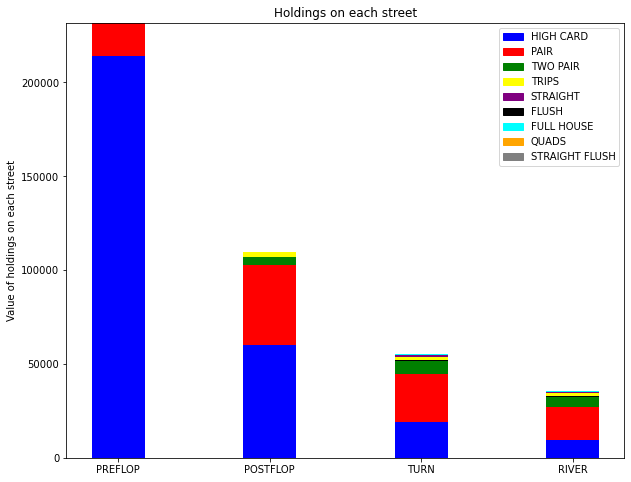

In [8]:
colors_i = { 0: 'blue', 1:'red', 2:'green',
             3: 'yellow', 4:'purple', 5:'black',
             6: 'cyan', 7:'orange', 8:'gray'} 
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
prev = [0,0,0,0]
for rank in hands['hand_rank'].unique():
    curr =[len(preflop[(preflop.hand_rank == rank)]), len(postflop[(postflop.hand_rank == rank)]), len(turn[(turn.hand_rank == rank)]), len(river[(river.hand_rank == rank)])]
    ax.bar(labels, curr, width, bottom=prev, color=colors_i[rank],  label='%d'%rank)
    prev = np.add(curr, prev)
    

blue_patch = mpatches.Patch(color='blue', label='HIGH CARD')
red_patch = mpatches.Patch(color='red', label='PAIR')
green_patch = mpatches.Patch(color='green', label='TWO PAIR')
yellow_patch = mpatches.Patch(color='yellow', label='TRIPS')
purple_patch = mpatches.Patch(color='purple', label='STRAIGHT')
black_patch = mpatches.Patch(color='black', label='FLUSH')
cyan_patch = mpatches.Patch(color='cyan', label='FULL HOUSE')
orange_patch = mpatches.Patch(color='orange', label='QUADS')
gray_patch = mpatches.Patch(color='gray', label='STRAIGHT FLUSH')

ax.set_ylabel('Value of holdings on each street')
ax.set_title('Holdings on each street')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch, purple_patch, black_patch, cyan_patch, orange_patch, gray_patch])
plt.show()
    

# Feature Extraction

In [9]:
hands

,num,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,my_num_raises_curr_phase,opp_num_raises_curr_phase,my_num_raises_total,opp_num_raises_total,num_outs,winning_prob,highest_card,num_aces,num_kings,num_queens
2,2.0,1,0,True,0.000485,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,32.745,0,0,0,0
3,3.0,1,0,False,0.005886,0,1,5,1.0,1.0,1.0,2.0,1.0,2.0,0,58.725,0,0,0,0
4,4.0,1,1,False,0.006114,0,3,5,0.0,0.0,0.0,0.0,2.0,2.0,15,31.500,9,0,0,0
5,5.0,2,1,True,0.124560,1,5,3,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,9,0,0,0
6,6.0,2,1,False,0.006114,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712834,142904.0,2,1,False,0.129992,1,3,5,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,12,1,1,0
712835,142905.0,1,1,True,0.006175,0,5,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,12,1,1,0
712836,142906.0,2,2,False,0.129992,1,4,5,0.0,0.0,0.0,0.0,3.0,3.0,11,23.100,12,1,1,0
712837,142907.0,0,2,True,0.006175,0,5,4,0.0,2.0,0.0,2.0,3.0,5.0,15,31.500,12,1,1,0


In [10]:
dealer_action = hands[(hands.dealer)]
blind_action = hands[(hands.dealer == False)]

In [11]:

prev_dealer_action = dealer_action.drop([712837])
prev_dealer_action = prev_dealer_action.rename(columns={'num': 'prev_num', 'action': 'prev_action','stage': 'prev_stage','dealer': 'prev_dealer','hand_strength': 'prev_hand_strength','hand_rank': 'prev_hand_rank',
             'opp_last_action': 'prev_opp_last_action','my_last_action': 'prev_my_last_action','my_stack_committed_curr_phase': 'prev_my_stack_committed_curr_phase','opp_stack_committed_curr_phase': 'prev_opp_stack_committed_curr_phase',
              'my_num_raises_curr_phase': 'prev_my_num_raises_curr_phase','opp_num_raises_curr_phase': 'prev_opp_num_raises_curr_phase', 'my_num_raises_total': 'prev_my_num_raises_total',
             'opp_num_raises_total': 'prev_opp_num_raises_total', 'num_outs': 'prev_num_outs', 'winning_prob': 'prev_winning_prob','highest_card': 'prev_highest_card',
             'num_aces': 'prev_num_aces','num_kings': 'prev_num_kings','num_queens': 'prev_num_queens'})
dealer_action = dealer_action.drop([2])

prev_blind_action = blind_action.drop([712840])
prev_blind_action = prev_blind_action.rename(columns={'num': 'prev_num', 'action': 'prev_action','stage': 'prev_stage','dealer': 'prev_dealer','hand_strength': 'prev_hand_strength','hand_rank': 'prev_hand_rank',
             'opp_last_action': 'prev_opp_last_action','my_last_action': 'prev_my_last_action','my_stack_committed_curr_phase': 'prev_my_stack_committed_curr_phase','opp_stack_committed_curr_phase': 'prev_opp_stack_committed_curr_phase',
              'my_num_raises_curr_phase': 'prev_my_num_raises_curr_phase','opp_num_raises_curr_phase': 'prev_opp_num_raises_curr_phase', 'my_num_raises_total': 'prev_my_num_raises_total',
             'opp_num_raises_total': 'prev_opp_num_raises_total', 'num_outs': 'prev_num_outs', 'winning_prob': 'prev_winning_prob','highest_card': 'prev_highest_card',
             'num_aces': 'prev_num_aces','num_kings': 'prev_num_kings','num_queens': 'prev_num_queens'})
blind_action = blind_action.drop([3])


In [12]:
prev_dealer_action

,prev_num,prev_action,prev_stage,prev_dealer,prev_hand_strength,prev_hand_rank,prev_opp_last_action,prev_my_last_action,prev_my_stack_committed_curr_phase,prev_opp_stack_committed_curr_phase,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
2,2.0,1,0,True,0.000485,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,32.745,0,0,0,0
5,5.0,2,1,True,0.124560,1,5,3,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,9,0,0,0
7,7.0,2,1,True,0.124560,1,4,6,1.0,1.0,1.0,1.0,3.0,3.0,11,23.100,9,0,0,0
10,10.0,1,2,True,0.124561,1,6,4,0.0,2.0,0.0,2.0,4.0,6.0,14,29.400,9,0,0,0
12,12.0,2,3,True,0.124561,1,5,3,0.0,0.0,0.0,0.0,6.0,6.0,14,29.400,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712824,142894.0,1,1,True,0.005659,0,5,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,10,0,0,1
712826,142896.0,0,2,True,0.005659,0,5,4,0.0,2.0,0.0,2.0,3.0,5.0,15,31.500,10,0,0,1
712829,142899.0,0,0,True,0.003064,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,45.350,0,0,0,0
712832,142902.0,1,0,True,0.001456,0,0,1,0.5,1.0,1.0,1.0,1.0,1.0,0,34.695,0,0,0,0


In [13]:
prev_blind_action

,prev_num,prev_action,prev_stage,prev_dealer,prev_hand_strength,prev_hand_rank,prev_opp_last_action,prev_my_last_action,prev_my_stack_committed_curr_phase,prev_opp_stack_committed_curr_phase,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
3,3.0,1,0,False,0.005886,0,1,5,1.0,1.0,1.0,2.0,1.0,2.0,0,58.725,0,0,0,0
4,4.0,1,1,False,0.006114,0,3,5,0.0,0.0,0.0,0.0,2.0,2.0,15,31.500,9,0,0,0
6,6.0,2,1,False,0.006114,0,3,4,0.0,1.0,0.0,1.0,2.0,3.0,15,31.500,9,0,0,0
8,8.0,1,1,False,0.006114,0,6,6,1.0,2.0,1.0,2.0,3.0,4.0,15,31.500,9,0,0,0
9,9.0,2,2,False,0.006114,0,5,6,0.0,0.0,0.0,0.0,4.0,4.0,18,37.800,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712823,142893.0,2,1,False,0.005657,0,3,5,0.0,0.0,0.0,0.0,2.0,2.0,15,31.500,10,0,0,1
712825,142895.0,2,2,False,0.005657,0,4,5,0.0,0.0,0.0,0.0,3.0,3.0,15,31.500,10,0,0,1
712833,142903.0,1,0,False,0.005552,0,1,5,1.0,1.0,1.0,2.0,1.0,2.0,0,57.530,0,0,0,0
712834,142904.0,2,1,False,0.129992,1,3,5,0.0,0.0,0.0,0.0,2.0,2.0,11,23.100,12,1,1,0


In [14]:
for col in prev_blind_action.columns:
    blind_action[col] = prev_blind_action[col].values

for col in prev_dealer_action.columns:
    dealer_action[col] = prev_dealer_action[col].values

In [15]:
features = pd.concat([dealer_action, blind_action], axis=0).reset_index()
features = features.drop(['index'], axis=1)
features

,num,action,stage,dealer,hand_strength,hand_rank,opp_last_action,my_last_action,my_stack_committed_curr_phase,opp_stack_committed_curr_phase,...,prev_my_num_raises_curr_phase,prev_opp_num_raises_curr_phase,prev_my_num_raises_total,prev_opp_num_raises_total,prev_num_outs,prev_winning_prob,prev_highest_card,prev_num_aces,prev_num_kings,prev_num_queens
0,5.0,2,1,True,0.124560,1,5,3,0.0,0.0,...,1.0,1.0,1.0,1.0,0,32.745,0,0,0,0
1,7.0,2,1,True,0.124560,1,4,6,1.0,1.0,...,0.0,0.0,2.0,2.0,11,23.100,9,0,0,0
2,10.0,1,2,True,0.124561,1,6,4,0.0,2.0,...,1.0,1.0,3.0,3.0,11,23.100,9,0,0,0
3,12.0,2,3,True,0.124561,1,5,3,0.0,0.0,...,0.0,2.0,4.0,6.0,14,29.400,9,0,0,0
4,2.0,0,0,True,0.005492,0,0,1,0.5,1.0,...,0.0,0.0,6.0,6.0,14,29.400,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432243,142895.0,2,2,False,0.005657,0,4,5,0.0,0.0,...,0.0,0.0,2.0,2.0,15,31.500,10,0,0,1
432244,142903.0,1,0,False,0.005552,0,1,5,1.0,1.0,...,0.0,0.0,3.0,3.0,15,31.500,10,0,0,1
432245,142904.0,2,1,False,0.129992,1,3,5,0.0,0.0,...,1.0,2.0,1.0,2.0,0,57.530,0,0,0,0
432246,142906.0,2,2,False,0.129992,1,4,5,0.0,0.0,...,0.0,0.0,2.0,2.0,11,23.100,12,1,1,0


In [16]:
from sklearn.utils import resample
nut_ranks={
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5: 5,
    6: 6,
    7: 6,
    8: 6
}
features['hand_rank'] = features['hand_rank'].map(nut_ranks)
features['prev_hand_rank'] = features['prev_hand_rank'].map(nut_ranks)
features['hand_rank'].value_counts()

0    302796
1    103422
2     16455
3      5531
4      1883
5      1205
6       956
Name: hand_rank, dtype: int64

In [21]:
high_card = features[(features.hand_rank == 0)]
pair = features[(features.hand_rank == 1)]
two_pair = features[(features.hand_rank == 2)]
trips = features[(features.hand_rank == 3)]
straight = features[(features.hand_rank == 4)]
flush = features[(features.hand_rank == 5)]
nuts = features[(features.hand_rank == 6)]

hand_ranks = [high_card, pair, two_pair, trips, straight, flush, nuts]

In [24]:

resampled = []
for hand_rank in hand_ranks:
    new = resample(hand_rank, replace=(10000 - len(hand_rank) > 0), n_samples=10000, random_state=999)
    resampled.append(new)

resampled_features = pd.concat(resampled, axis=0)
resampled_features['hand_rank'].value_counts()

6    10000
5    10000
4    10000
3    10000
2    10000
1    10000
0    10000
Name: hand_rank, dtype: int64